In [1]:
import warnings
import numpy as np
from numpy.linalg import matrix_rank
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
boston = datasets.load_boston()
print(boston.data.shape, boston.target.shape)
print(boston.feature_names)

(506, 13) (506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [3]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df = pd.concat([df, pd.Series(boston.target, name='MEDV')], axis=1)

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [6]:
print("Dimension of the data: ", df.shape)

no_of_rows = df.shape[0]
no_of_columns = df.shape[1]

print("Number of  rows %d" % no_of_rows)
print("Number of  columns %d" % no_of_columns)

Dimension of the data:  (506, 14)
Number of  rows 506
Number of  columns 14


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121048dc0>,
      dtype=object)

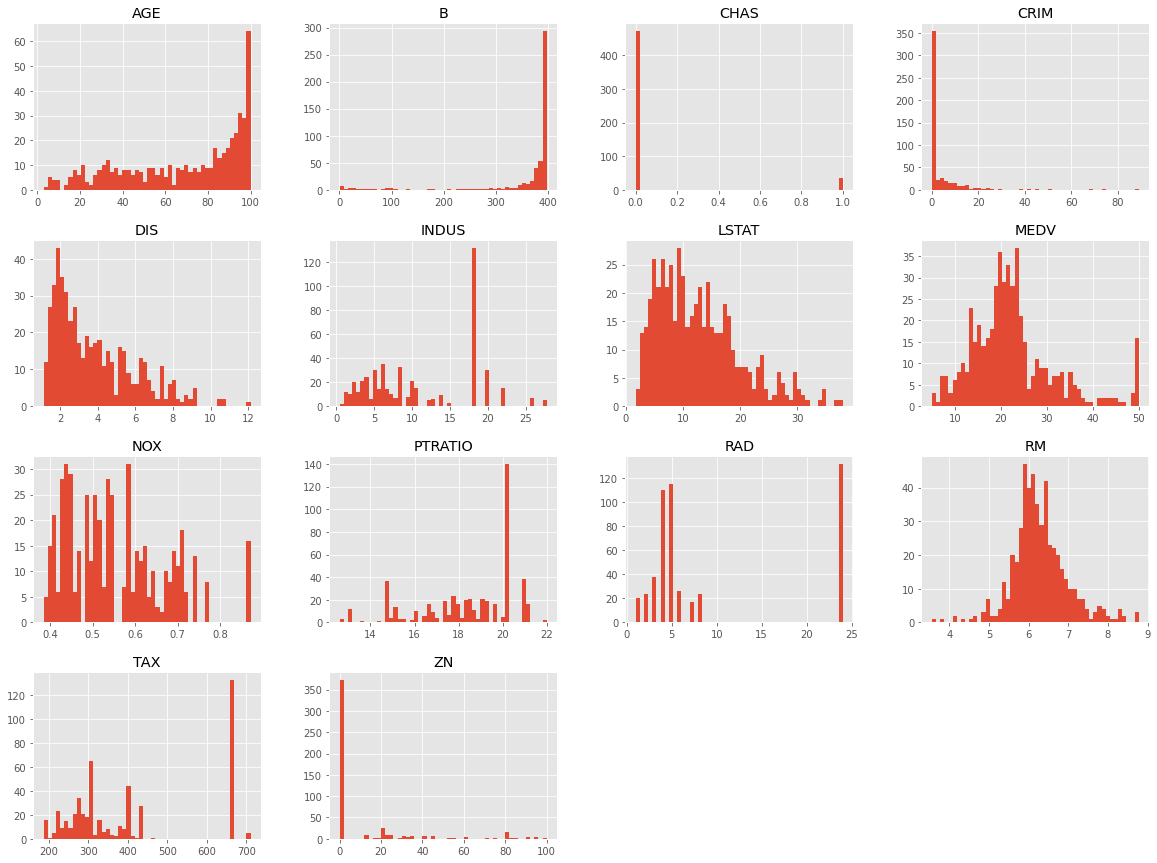

In [7]:
plt.style.use('ggplot')
df.hist(bins=50, figsize=(20,15))

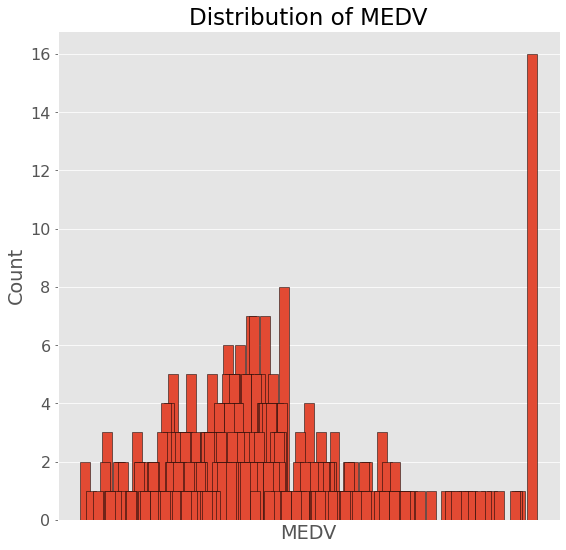

In [8]:
plt.rcParams['font.size']=16
plt.rcParams['figure.figsize'] = (9,9)

plt.bar(df['MEDV'].value_counts().index,
       df['MEDV'].value_counts().values,
       fill = 'red', edgecolor = 'k', width = 1)
plt.xlabel('MEDV');
plt.ylabel('Count');
plt.title('Distribution of MEDV')
plt.xticks(list(range(1,1)));

In [9]:
df['MEDV'].value_counts()

50.0    16
25.0     8
23.1     7
21.7     7
22.0     7
        ..
12.8     1
29.9     1
9.6      1
36.1     1
13.0     1
Name: MEDV, Length: 229, dtype: int64

In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [12]:
df.corr()['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [13]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


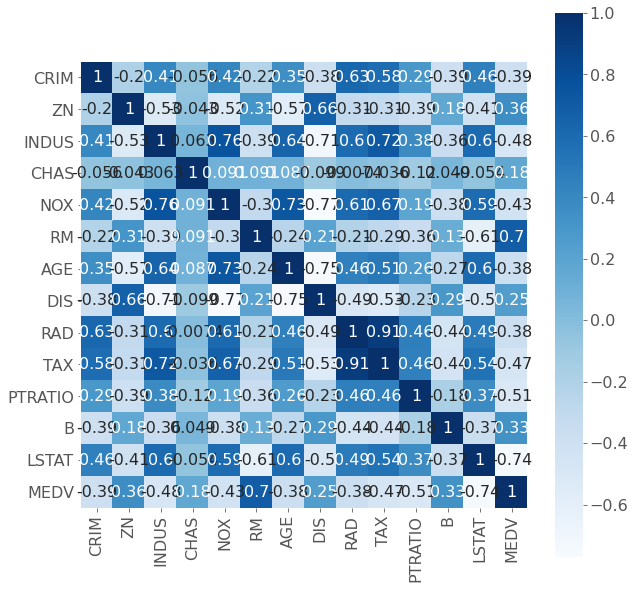

In [14]:
correlation = df.corr()

fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='Blues')

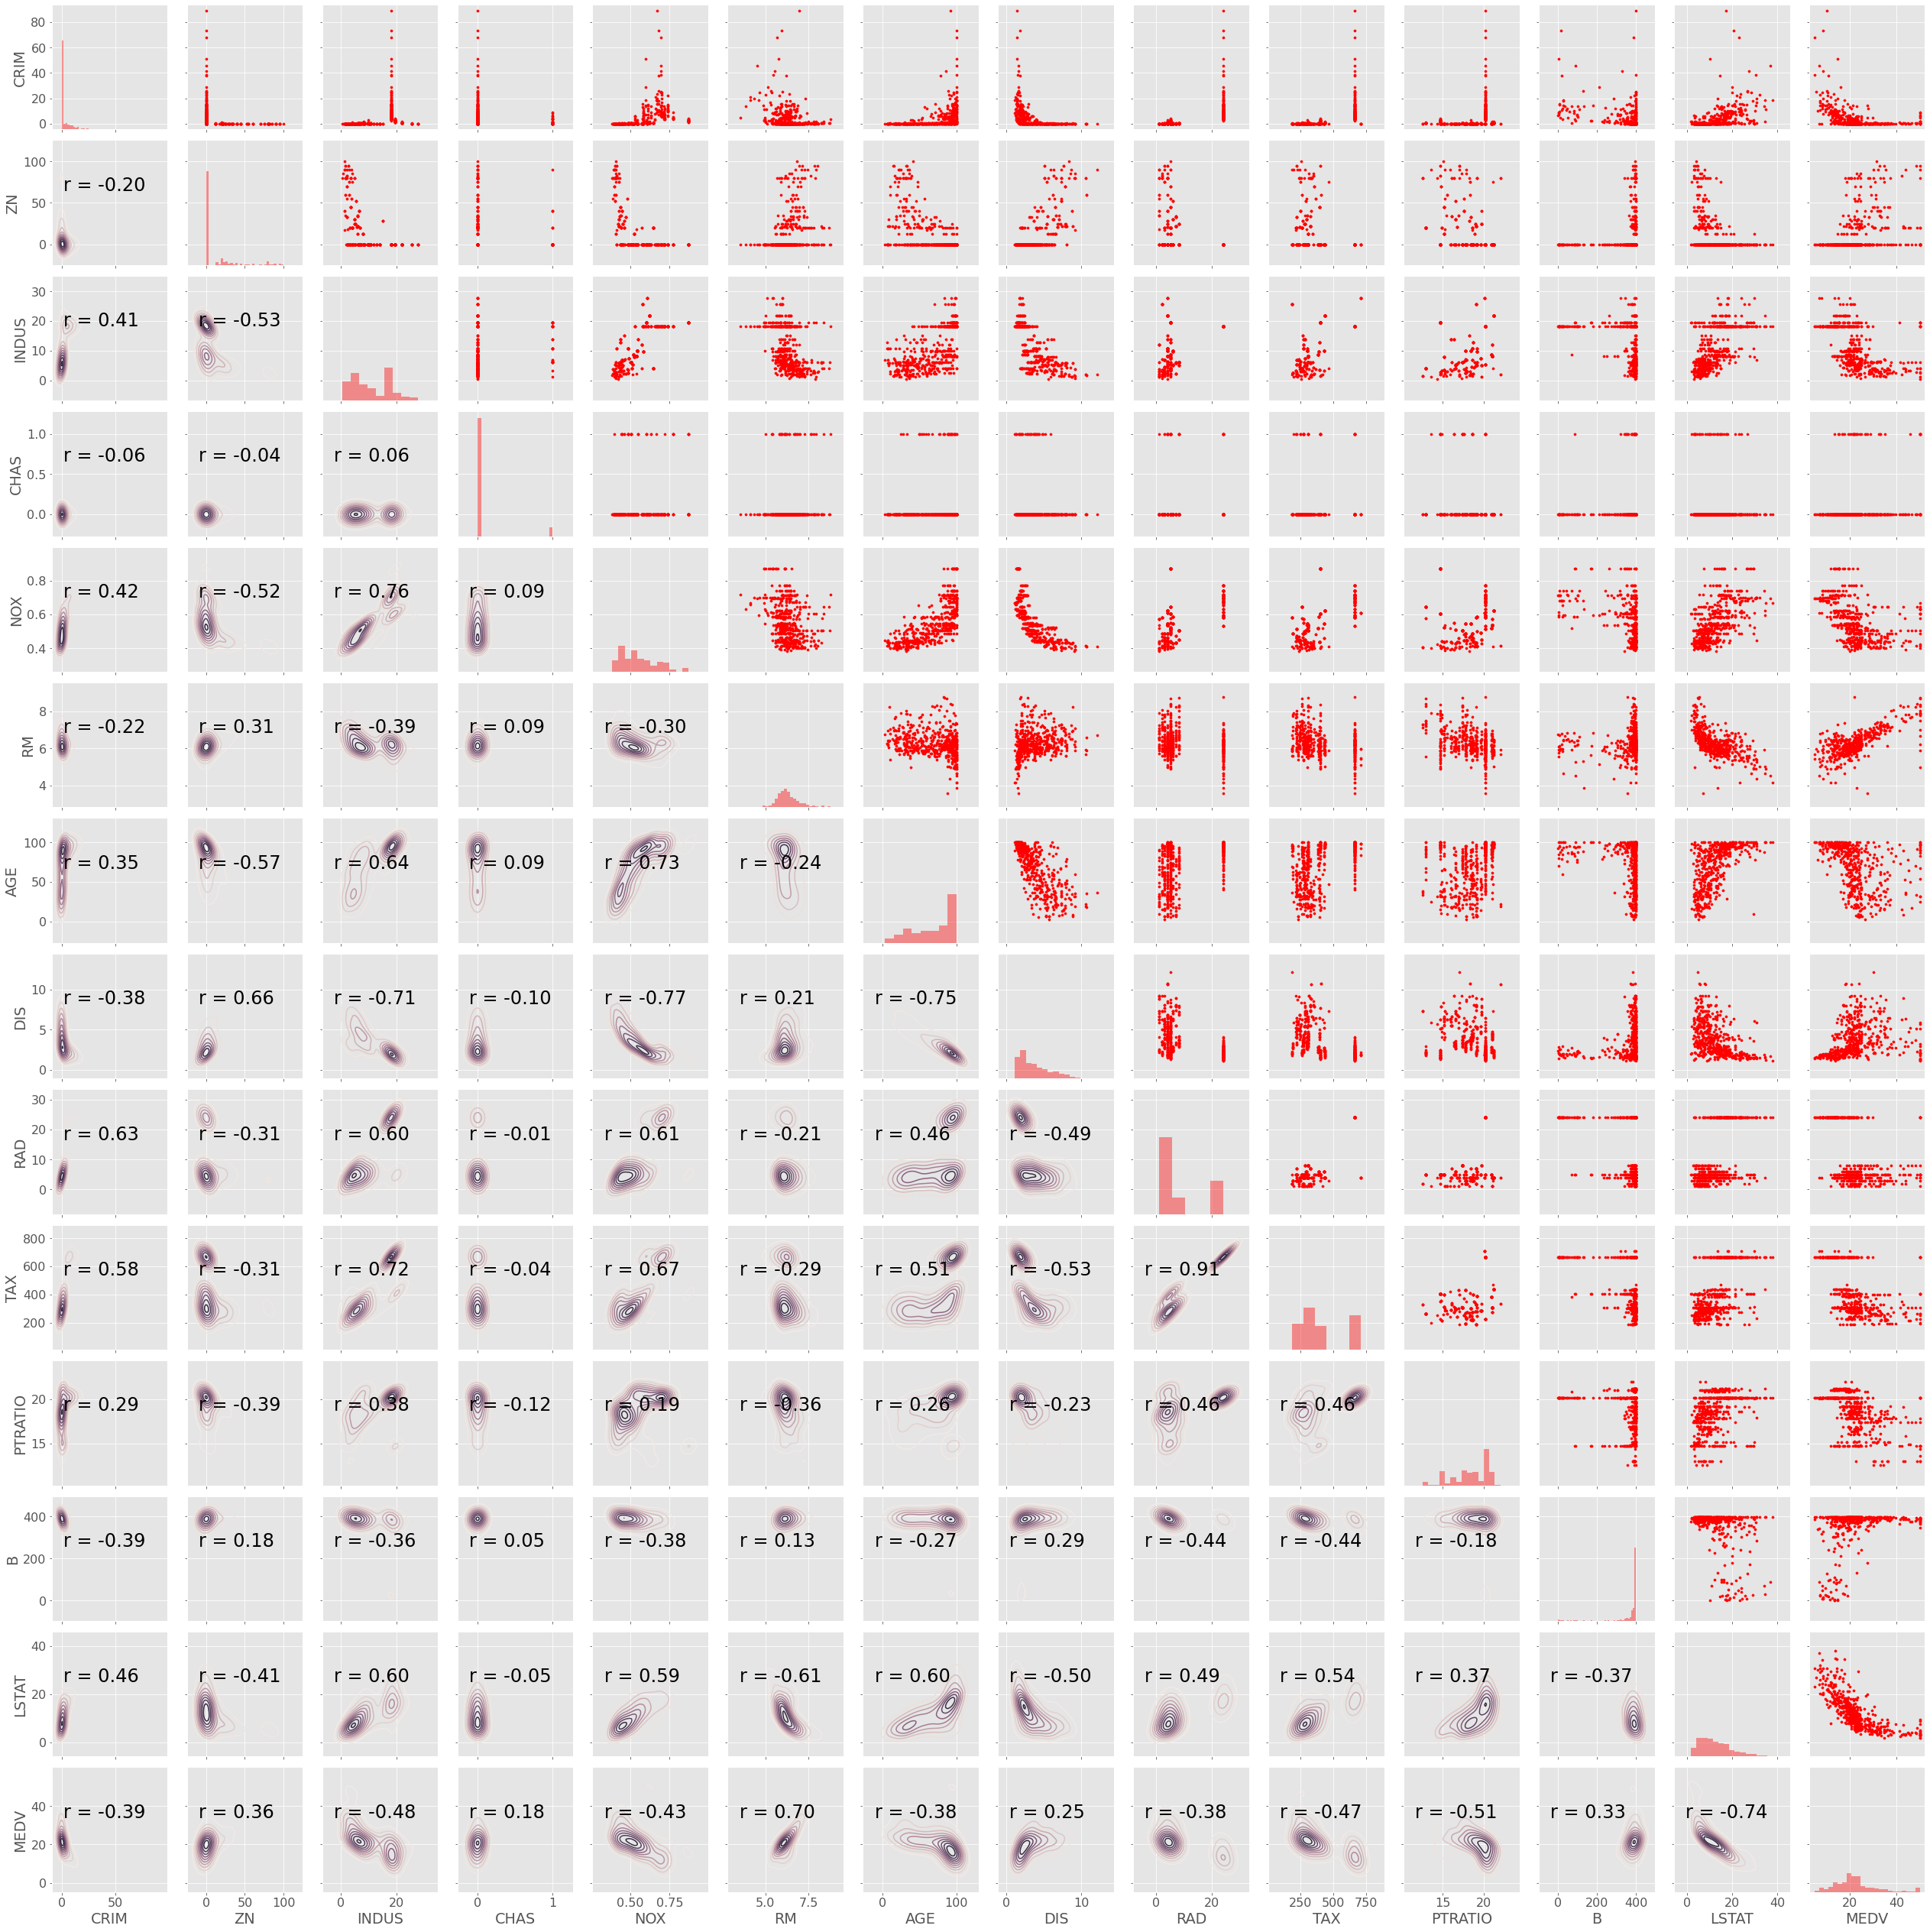

In [15]:
warnings.filterwarnings('ignore')

def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1,.6), xycoords=ax.transAxes,
                size=24)
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             #hue = 0.5, as_cmap=True)
sns.set_context(font_scale=2)
g = sns.PairGrid(df)

g.map_upper(plt.scatter, s=10, color = 'red')

g.map_diag(sns.distplot, kde=False, color = 'red')

g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);
    

In [16]:
allData = df

X = df.drop(columns='MEDV')

y = df['MEDV']

print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [17]:
print("Rank of X:", matrix_rank(X))

Rank of X: 13


In [18]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,
        y, test_size=0.2, random_state=42)

In [21]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print("Intercept: \n", lin_reg.intercept_)
print("Coefficients: \n", lin_reg.coef_)
print("\n----------------------------- Model Evaluation -----------------------------")

y_train_predicted = lin_reg.predict(X_train)

print("\nMean squared error: %.2f"
      % mean_squared_error(y_train, y_train_predicted))

print("Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" % r2_score(y_train, y_train_predicted))

print("Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" % lin_reg.score(X_train, y_train))


Intercept: 
 22.485268239316902
Coefficients: 
 [-0.97149423  0.70155562  0.27675212  0.70653152 -1.99143043  3.11571836
 -0.17706021 -3.04577065  2.28278471 -1.79260468 -1.97995351  1.12649864
 -3.62814937]

----------------------------- Model Evaluation -----------------------------

Mean squared error: 21.64
Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.75
Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.75


In [22]:
ridge_alpha = 1.0
lin_reg_ridge = Ridge(alpha=ridge_alpha, solver="cholesky")
lin_reg_ridge.fit(X_train, y_train)

print("Intercept: \n", lin_reg_ridge.intercept_)
print("Coefficients: \n", lin_reg_ridge.coef_)
print("Number of Iterations: \n", lin_reg_ridge.n_iter_)
print("\n----------------------------- Model Evaluation -----------------------------")

y_train_predicted_ridge = lin_reg_ridge.predict(X_train)

print("Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" % r2_score(y_train, y_train_predicted_ridge))

Intercept: 
 22.484854796146763
Coefficients: 
 [-0.96203397  0.68255872  0.25071604  0.71033762 -1.96157279  3.12232106
 -0.17845861 -3.0100255   2.20195592 -1.71784558 -1.97082455  1.12414013
 -3.61478723]
Number of Iterations: 
 None

----------------------------- Model Evaluation -----------------------------
Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.75


In [24]:
y_test_predicted = lin_reg_ridge.predict(X_test)
ridge_test_mse = mean_squared_error(y_test, y_test_prediction)
print("Mean squared error: %.2f" % ridge_test_mse)
print("Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" % r2_score(y_test, y_test_predicted))


Mean squared error: 24.31
Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.67


In [25]:
lasso_alpha = 0.001
lin_reg_lasso = Lasso(alpha=lasso_alpha)
lin_reg_lasso.fit(X_train, y_train)
print("Intercept: \n", lin_reg_lasso.intercept_)
print("Coefficients: \n", lin_reg_lasso.coef_)
print("Number of Iterations: \n", lin_reg_lasso.n_iter_)
print("\n----------------------------- Model Evaluation -----------------------------")
y_train_predicted_lasso = lin_reg_lasso.predict(X_train)
print("\nMean squared error: %.2f"
      % mean_squared_error(y_train, y_train_predicted_lasso))
print("Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" 
      % r2_score(y_train, y_train_predicted_lasso))




Intercept: 
 22.485113503791307
Coefficients: 
 [-0.96884467  0.6964981   0.26764373  0.7066938  -1.98536449  3.11636016
 -0.17476749 -3.03889473  2.26432318 -1.77408168 -1.97821676  1.12530339
 -3.6278453 ]
Number of Iterations: 
 61

----------------------------- Model Evaluation -----------------------------

Mean squared error: 21.64
Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.75


In [31]:
y_test_predicted = lin_reg_lasso.predict(X_test)
lasso_test_mse = mean_squared_error(y_test, y_test_predicted)
print("Mean squared error: %.2f" % lasso_test_mse)
print("Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" % r2_score(y_test, y_test_predicted))
      

Mean squared error: 24.29
Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.67


In [32]:
print("%17s (alpha = %3.3f)  %10s (alpha = %3.3f)" % ("Ridge",ridge_alpha, "Lasso", lasso_alpha))
print("%17s MSE = %3.3f  %12s MSE = %3.3f" % (" ",ridge_test_mse, " ", lasso_test_mse))
print("________________________________________________________________\n")
for i in range(lin_reg_ridge.coef_.shape[0]):
    print("%8s: %15f  %30f" %(boston.feature_names[i], lin_reg_ridge.coef_[i], lin_reg_lasso.coef_[i]))


            Ridge (alpha = 1.000)       Lasso (alpha = 0.001)
                  MSE = 24.315               MSE = 24.295
________________________________________________________________

    CRIM:       -0.962034                       -0.968845
      ZN:        0.682559                        0.696498
   INDUS:        0.250716                        0.267644
    CHAS:        0.710338                        0.706694
     NOX:       -1.961573                       -1.985364
      RM:        3.122321                        3.116360
     AGE:       -0.178459                       -0.174767
     DIS:       -3.010025                       -3.038895
     RAD:        2.201956                        2.264323
     TAX:       -1.717846                       -1.774082
 PTRATIO:       -1.970825                       -1.978217
       B:        1.124140                        1.125303
   LSTAT:       -3.614787                       -3.627845


In [33]:
lin_reg_enet = ElasticNet(alpha=0.0001, l1_ratio=0.5)

# Train the model
lin_reg_enet.fit(X_train, y_train)



# The intercept
print("Intercept: \n", lin_reg_enet.intercept_)

# The coefficients
print("Coefficients: \n", lin_reg_enet.coef_)

# The number of iterations
print("Number of Iterations: \n", lin_reg_enet.n_iter_)

print("\n----------------------------- Model Evaluation -----------------------------")

# Make prediction 
y_train_predicted_enet = lin_reg_enet.predict(X_train)


print("\nMean squared error: %.2f"
      % mean_squared_error(y_train, y_train_predicted_enet))


# Explained variance score: 1 is perfect prediction
print("Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" % r2_score(y_train, y_train_predicted_enet))

Intercept: 
 22.485251811705538
Coefficients: 
 [-0.97116496  0.7009068   0.27575217  0.70661929 -1.9905123   3.11589008
 -0.17697507 -3.04469299  2.28016822 -1.79010527 -1.97967881  1.12639111
 -3.62786151]
Number of Iterations: 
 81

----------------------------- Model Evaluation -----------------------------

Mean squared error: 21.64
Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.75


In [34]:
y_test_predicted = lin_reg_enet.predict(X_test)


print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_test_predicted))


# Explained variance score: 1 is perfect prediction
print("Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" % r2_score(y_test, y_test_predicted))

Mean squared error: 24.29
Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.67


In [42]:
param_grid = {'alpha': [1.0, 0.1, 0.01, 0.001], 'l1_ratio': [1, 0.5, 0.2, 0], 'max_iter':[100, 400, 1000, 10000]}

enet = ElasticNet()

enet_cv = GridSearchCV(enet, param_grid, scoring='neg_mean_squared_error', cv=10, verbose=2, n_jobs=-1)
enet_cv.fit(X_train, y_train)
params_optimal_enet = enet_cv.best_params_
print("Best Score (negative mean squared error): %f" % enet_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_enet)
print("\n")

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.5s


Best Score (negative mean squared error): -24.073327
Optimal Hyperparameter Values:  {'alpha': 0.01, 'l1_ratio': 0, 'max_iter': 1000}




[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:    4.2s finished


In [44]:
lin_reg_enet = ElasticNet(**params_optimal_enet)
lin_reg_enet.fit(X_train, y_train)
print("Intercept: \n", lin_reg_enet.intercept_)
print("Coefficients: \n", lin_reg_enet.coef_)
print("Number of Iterations: \n", lin_reg_enet.n_iter_)
print("\n----------------------------- Model Evaluation -----------------------------")
y_train_predicted_enet = lin_reg_enet.predict(X_train)
print("Mean squared error: %.2f"
      % mean_squared_error(y_train, y_train_predicted_enet))
print("Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" % r2_score(y_train, y_train_predicted_enet))


Intercept: 
 22.4837683961124
Coefficients: 
 [-0.93618482  0.63150597  0.18201482  0.72034352 -1.8766665   3.13892025
 -0.18182713 -2.90751775  1.98869978 -1.52481576 -1.94485719  1.11708809
 -3.5760995 ]
Number of Iterations: 
 1000

----------------------------- Model Evaluation -----------------------------
Mean squared error: 21.66
Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.75


In [47]:
scores = cross_val_score(lin_reg_enet, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
print(scores)

print("Negative Mean Squared Error: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[-14.32398658 -17.97884389 -28.36958451 -45.05198153 -21.31694739
 -26.94022427 -19.54718826 -20.69487106 -13.2786652  -33.2309811 ]
Negative Mean Squared Error: -24.07 (+/- 18.32)


In [48]:
y_test_predicted = lin_reg_enet.predict(X_test)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_test_predicted))
print("Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" % r2_score(y_test, y_test_predicted))

Mean squared error: 24.38
Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.67
